# Introduction to the Finite Element Method (FEM)

The evolution of a physical quantity in time and space can usually be described in terms of partial differential equations (PDEs). But most of the time, such PDEs cannot be solved with analytical methods. 
Various types of discretization and numerical methods can be employed to construct an approximation of the original problem, defined as a numerical model. The finite element method (FEM) is one way to compute such approximations.

## The Poisson equation

Let's start with a reference in the field of scientific computing : the heat equation, which models how a quantity such as heat (denoted as $u$) diffuses through a given region $\Omega$ 
$$\frac{\partial u}{\partial t} = \Delta u$$

Imagine a 1D stick illustrated as the interval $[0, 1]$ being held at a fixed temperature $u(0)=0$ at one end, and $u(1)=1$ at the other. Initially, there will be some variation in temperature, but after some time the rod will reach a steady-state temperature distribution, making time derivative $\frac{\partial u}{\partial t}$ negligible. The Laplacian term $\Delta u$ reads as $\Delta u = \frac{\partial^2u} {\partial x^2}$ in 1D, which leads to 
$$ \frac{\partial^2u} {\partial x^2} = 0 \qquad \text{with} ~~u(0)=0 ~\text{and}~ u(1)=1,$$

also known as the Poisson equation, very useful and very popular as a first step when learning about the finite element method. The concepts involved in solving the Poisson equation generalise very neatly to more complicated equations and higher dimensions.

For brevity, we write derivatives with a subscript, so the second derivative with respect to $x$ is $u_{xx}$.

### Step 1 - The mesh
Before jumping in the mathematical details, let's start with the finite element discretization. Despite the enormous progress in terms of computer power, computers are still limited to solving a finite number of equations. We then need to discretize our problem in space (discretization of our domain $\Omega$), and in time when considering time dependent problems. The discretization in space consists in the subdivision of $\Omega$ into a (finite) set of "bricks" which we call a *mesh*.![meshes.png](fig/meshes.png)

The interval domain $\Omega = [0,1]$ can be easily discretized by choosing $N = 6$ points $[x_1, \dots, x_{N}]$ distributed uniformly in the domain, of which the first point is $x_1=0$ and the last point is $x_6=1$. The *mesh* then consists in the 5 intervals that comes out of this.
We denote the distance between two adjacent mesh points by $h=\frac 1 {N-1}$.


### Step 2 - The weak form

The previously introduced Poisson equation written as previously is called *strong form*, of which $u$ is the *strong solution*. A characteristic feature of the Finite Element Method (FEM) approach is the reformulation of this form into an equivalent form called *weak form*. The interest of such a formulation resides in the usability of real and functional analysis concepts as the Hilbert and Sobolev function spaces, providing a strong mathematical foundation to the FE method in comparison to other methods.
One shall also note that the *strong solution* always satisfies the *weak formulation*.

The *weak form* is obtained by multiplying the previous strong form by an arbitrary function $v$ called *test function*, and integrating this expression over the domain $\Omega$. Generally speaking, this leads to find $u \in X(\Omega)$ such that 
$$a(u,v) = f(v) ~\forall v \in Y(\Omega)$$ 
where $a$ and $f$ are a *bilinear* and a *linear* form, respectively, and with $X(\Omega)$ and $Y(\Omega)$ are two function spaces to be determined.

The weak formulation of our previous Poisson problem then reads : 
$$\underbrace{ \int \limits_0^1 u_{xx} \cdot v ~\text{dx} }_{a(u,v)}= \underbrace{0}_{f(v)}$$

In some sense, this is 'easier' to satisfy than the original equation, because it is possible that $\int \limits_0^1 f  \: \text{dx} = 0$ even though $f \neq 0$ at every point. 
However, it is possible to show that, roughly speaking, if the integral equation is true for _every_ function $v$, then the original equation must be true as well, so requiring the latter equation to hold for _all_ $v$ gives us something equivalent to the original equation.

### Step 3 - The weak solution

The previous weak formulation supposes the knowledge of the function spaces $X(\Omega)$ (and $Y(\Omega)$, but we focus on the case $X(\Omega)$ = $Y(\Omega)$). The FE method is a way of approximating the continuous space $X(\Omega)$ as a discrete space $X_{\mathcal{N}}(\Omega)$. The approximation $u_\mathcal{N} \in X_{\mathcal{N}}(\Omega)$ (discrete) of our strong solution $u \in X(\Omega)$ (continuous) is defined as a linear combination of *basis functions* $\{ \phi_i \}_{i=1}^{\mathcal{N}}$ such that : 
$$ u_\mathcal{N} = \sum_{i=1}^{\mathcal{N}} u_i \phi_i $$

The *basis functions* defining this function space are defined from the [type of finite element](https://fenicsproject.org/pub/periodic-table/periodic-table-of-the-finite-elements.pdf).

Ciarlet defines a finite element as a tuple $(K, P_K, \Sigma_K)$ composed of :
- A geometrical domain $K$ *i.e.* simplex or hypercube
- A *primal space* $P_K$ as a polynomial space of finite dimension where the basis function $\{ \phi_i \}_{i=1}^{\mathcal{N}}$ live
- A *dual space* $\Sigma_K$ as a set of linear functionals $\{ \sigma_i : P_K \rightarrow \mathbb{R} \}$ called *degrees of freedom*.
These degrees of freedom as defined such that :
$$\sigma_i(\phi_j) = \delta_{ij} ~\forall i,j=1, \dots, \mathcal{N}$$

The Lagrange finite elements (of order $k$) are $H_1$ conforming elements, *i.e.* suitable for variational problems with solution living in a $H_1$ [Hilbert space](https://en.wikipedia.org/wiki/Hilbert_space). These elements are the mostly used type of FE, defining the degrees of freedom $\sigma_i$ to be the evaluation of the polynomials at interpolation points : 
$$ \sigma_i(p) = p(d_i) ~\text{with}~ p \in \mathbb{P}_k$$

The number of degrees of freedom per mesh cell *i.e.* per element depends on the polynomial degree $k$

![P1P2-1d2d3d.png](fig/P1P2-1d2d3d.png)
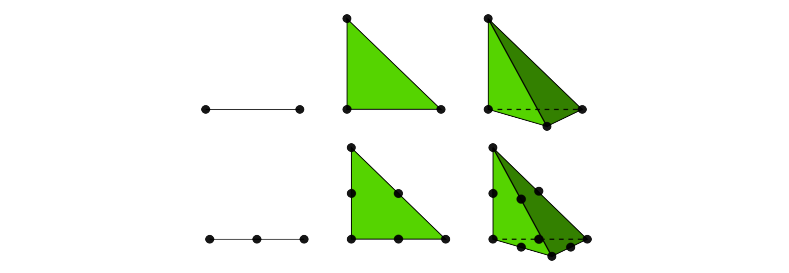

Back to our Poisson problem defined on the interval $\Omega = [0,1]$ with $N=6$ points, we can plot the lowest order (P1) *basis functions* $\{ \phi_i \}_{i=1}^6$ :

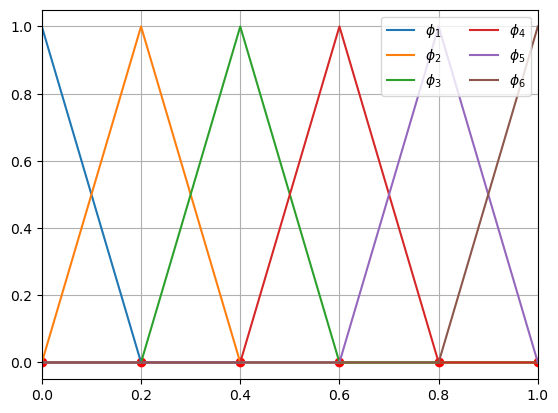

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 6
x = np.linspace(0, 1, N)

def phi(i):
    y = np.zeros(N)
    y[i] = 1.
    return y

plt.plot(x, np.zeros_like(x), "ro")

for i in range(N):
    plt.plot(x, phi(i), label=rf"$\phi_{i+1}$")

plt.xlim(0, 1)
plt.grid()
plt.legend(ncol=2, loc="upper right")

One shall note that the *basis functions* of our approximation space have discontinuous derivative in space as shown for $\phi_3$ in the following plots : 

(0.0, 1.0)

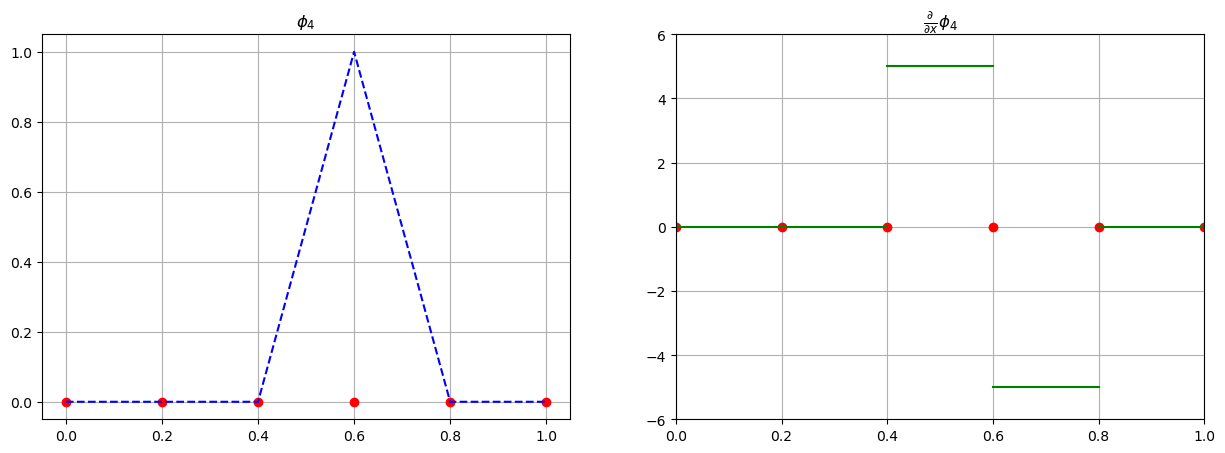

In [2]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
i = 3
h = 1/(N-1)
ax1.set_title(rf"$\phi_{i+1}$")

ax1.plot(x, np.zeros(N), "ro")
ax1.plot(x, phi(i), "b--")
ax1.grid()

ax2.set_title(r"$\frac{\partial}{\partial x}$"+rf"$\phi_{i+1}$")

ax2.plot(x, N*[0], "ro")
ax2.grid()
x1, x2 = x[:i], x[(i+1):]
ax2.plot(x1, [0]*x1.shape[0], "g-")
ax2.plot(x2, [0]*x2.shape[0], "g-")
ax2.plot([x[i-1], x[i]], [1/h, 1/h], "g-")
ax2.plot([x[i], x[i+1]], [-1/h, -1/h], "g-")

ax2.set_ylim(-N, N)
ax2.set_xlim(0, 1)

Then, the second derivatives $\phi_{xx}$ are zero everywhere and are infinite on the corresponding mesh point $x_i$, which becomes an issue when dealing with $u_{xx} = \sum \limits_{i=1}^\mathcal{N} u_i (\phi_i)_{xx}$. 
The integration by part together wih the Green's theorem allow us to rewrite the second derivatives in space in the variational form, which becomes : 
$$ a(u,v) = \int_{\Omega} \Delta u \cdot v = \int_{\delta \Omega} (\nabla u \cdot n) v 
- \int_{\Omega} \nabla u \cdot \nabla v = 0 $$

Back to our 1D example with $\Omega = [0,1]$, this weak formulation reads :
$$ v(1)u_x(1) - v(0) u_x(0) - \int\limits_0^1 u_x \cdot v_x \: \text{dx}= 0 $$

### Step 4 - Assembling and solving the system

Again, the FE method approximates the strong solution $u$ of our problem as a linear combination of discrete values at the degrees of freedom (interpolation points) multiplied by the corresponding *basis functions*. The use of lowest order Lagrange FE together with our previous discretization of the 1D domain $\Omega = [0,1]$ can be illustrated as follows :

![FEM_intro1.png](fig/FEM_intro1.png)

The discretized *weak formulation* $a(u_{\mathcal N},v_{\mathcal N}) = f(v_{\mathcal N})$ previously introduced can be written as a system 
$$ \mathcal{A}_\mathcal{N} u_{\mathcal N} = \mathcal B_{\mathcal N}, $$
using the definition of $u_{\mathcal N} \in X_{\mathcal N}(\Omega)$ as $u_{\mathcal N} = \sum \limits_{i=1}^{\mathcal N} u_i \phi_i$ and the discrete test functions $v_{\mathcal N} \in X_{\mathcal N}(\Omega)$ as $v_{\mathcal N} = \sum \limits_{j=1}^{\mathcal N} v_j \phi_j$.

Indeed, we can write
$$
a(u_{\mathcal N},v_{\mathcal N}) = a(\sum \limits_{i=1}^{\mathcal N} u_i \phi_i, \sum \limits_{j=1}^{\mathcal N} v_j \phi_j)
= \sum \limits_{i=1}^{\mathcal N} u_i \sum \limits_{j=1}^{\mathcal N} v_j a(\phi_i, \phi_j)
$$
and 
$$
f(v_{\mathcal N}) = \sum \limits_{j=1}^{\mathcal N} v_j f(\phi_j)
$$.

Then, finding $u_{\mathcal N} \in X_{\mathcal N}(\Omega)$ such that $a(u_{\mathcal N}, v_{\mathcal N}) = f(v_{\mathcal N}) ~\forall v \in X_{\mathcal N}(\Omega)$ can be rewritten as : 

Find $u_{\mathcal N} = [u_1, \dots, u_{\mathcal N}]$ such that :
$$
 \underbrace{
 \begin{bmatrix}
    a(\phi_1, \phi_1) & \dots & \dots & \dots & a(\phi_{\mathcal N}, \phi_1) \\[2.2pt]
    \vdots & \ddots & {} & {} & \vdots \\[2.2pt]
    \vdots & {} & a(\phi_j, \phi_j) & {} & \vdots \\[2.2pt]
    \vdots & {} & {} & \ddots & \vdots \\[2.2pt]
    a(\phi_1, \phi_{\mathcal N}) & \dots & \dots & \dots & a(\phi_{\mathcal N}, \phi_{\mathcal N})
\end{bmatrix}}_{\mathcal{A}_{\mathcal N}(i,j) = a(\phi_j, \phi_i)}
\begin{bmatrix}
    u_1 \\[2.2pt]
    \vdots \\[2.2pt]
    u_j \\[2.2pt]
    \vdots \\[2.2pt]
    u_{\mathcal N} 
\end{bmatrix} 
= 
\underbrace{
\begin{bmatrix}
    f(\phi_1) \\[2.2pt]
    \vdots \\[2.2pt]
    f(\phi_j) \\[2.2pt]
    \vdots \\[2.2pt]
    f(\phi_{\mathcal N}) 
\end{bmatrix}}_{\mathcal{B}_{\mathcal N}(j) = f(\phi_j)}
$$

Such a system is assembled element by element. For each entity $K$ of the mesh we compute the corresponding local tensor $\mathcal A^K_{\mathcal N}$, to be added to the global tensor $\mathcal A_\mathcal{N}$. 

![solving.png](fig/solving.png)

Back to our 1D Poisson problem on $\Omega = [0,1]$, each entity of the mesh is an interval $[x_i, x_{i+1}]$ with $1 \leqslant i < \mathcal N$.
The corresponding local tensor is : 
$$
 \begin{bmatrix}
 \displaystyle{
 \int \limits_{x_i}^{x_{i+1}} \frac{\partial \phi_i}{\partial x} \frac{\partial \phi_{i}}{\partial x}} &
 \displaystyle{
 \int \limits_{x_i}^{x_{i+1}} \frac{\partial \phi_{i+1}}{\partial x} \frac{\partial \phi_{i}}{\partial x}}\\
 \displaystyle{
  \int \limits_{x_i}^{x_{i+1}} \frac{\partial \phi_i}{\partial x} \frac{\partial \phi_{i+1}}{\partial x}} &
  \displaystyle{
 \int \limits_{x_i}^{x_{i+1}} \frac{\partial \phi_{i+1}}{\partial x} \frac{\partial \phi_{i+1}}{\partial x}} \\
 \end{bmatrix}
 =
 \begin{bmatrix}
 \displaystyle{\frac{1}{h}} & -\displaystyle{\frac{1}{h}} \\
 -\displaystyle{\frac{1}{h}} & \displaystyle{\frac{1}{h}} \\
 \end{bmatrix}
$$

Each of these local tensor is added to the global matrix $\mathcal A_{\mathcal N}$.

Last but not least, the problem needs boundary conditions to be well posed. In the case of our Poisson problem, we imposed $u(0) = 0$ and $u(1) = 1$. These type of boundary conditions known as *Dirichlet boundary conditions* are imposed directly in the system, replacing the correspondings rows and giving 
$$ \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0 \\
    -\frac 1 h & \frac 2h & - \frac 1h & 0 & 0 & 0\\
    0 & -\frac 1 h & \frac 2h & - \frac 1h & 0 & 0 \\
    0 & 0 & -\frac 1 h & \frac 2h & - \frac 1h & 0 \\
    0 & 0 & 0 & -\frac 1 h & \frac 2h & - \frac 1h \\
    0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}\begin{bmatrix}
    u_1 \\[2.2pt]
    u_2 \\[2.2pt]
    u_3 \\[2.2pt]
    u_4 \\[2.2pt]
    u_5 \\[2.2pt]
    u_6
\end{bmatrix} = \begin{bmatrix}
    0 \\[2.2pt]
    0 \\[2.2pt]
    0 \\[2.2pt]
    0 \\[2.2pt]
    0 \\[2.2pt]
    1
\end{bmatrix}
$$

Note that this system is *sparse* in the sense that the equation you get for $v=\phi_i$ only has 3 unknowns: $u_{i-1}, u_i$ and $u_{i+1}$, and that this would be true even if $N$ was a much larger number than 6. This sparsity comes from the fact that the $\phi_i$ are very 'local' functions. Though we will not go into details here, this locality is really what makes the finite element method so powerful, as a sparse system of equations is a lot easier to solve numerically than a dense one.

We can then use any of your favorite linear solver to solve this system and find our approximation $u_\mathcal N = [u_1, \dots, u_{\mathcal N}]$ :

In [3]:
H = 1/h
A = np.array(([
    [1, 0, 0, 0, 0, 0],
    [-H, 2*H, -H, 0, 0, 0],
    [0, -H, 2*H, -H, 0, 0],
    [0, 0, -H, 2*H, -H, 0],
    [0, 0, 0, -H, 2*H, -H],
    [0, 0, 0, 0, 0, 1],

]))

b = np.array([0, 0, 0, 0, 0, 1])

u = np.linalg.solve(A, b)
print("u = ", u)

u =  [-8.8817842e-16  2.0000000e-01  4.0000000e-01  6.0000000e-01
  8.0000000e-01  1.0000000e+00]


From the definition of $u_{\mathcal N}$ as a linear combination of the basis functions $\{ \phi_i \}_{i=1}^N$, it can easily be plotted, showing we get the expected solution : 

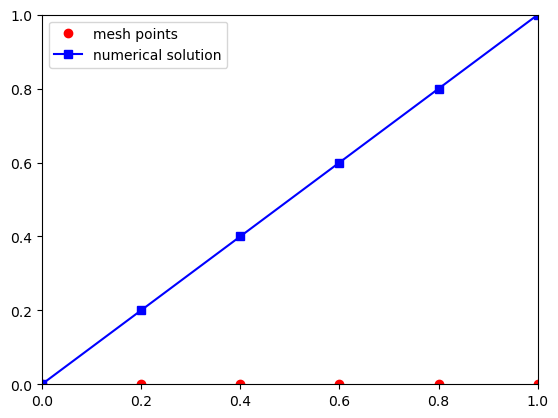

In [4]:
U = np.zeros(N)
for i in range(N):
    U += u[i]*phi(i)

plt.plot(x, [0]*N, "ro", label="mesh points")
plt.plot(x, U, "-bs", label="numerical solution")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

We see that in this case we get a very nice and linear solution $u(x) = 1-x$. Because $u_{xx}=0$ and the boundary conditions are satisfied, this is actually the real solution of the equation.

# Summary
![summary.png](fig/summary.png)

The Finite Element Method can also be used to solve much more complicated PDEs, using more sophisticated basis functions $\phi_i$, on more complicated domains $\Omega$, etc... without significant deviations from the above procedure. 
The next part will give examples of the method applied to more exciting equations and demonstrate how to use *FEniCS*, a popular open-source computing platform for solving partial differential equations.


# Exercises

1. Repeat the procedure outlined here for the equation $u_{xx} + u = 0$. If you want, let the number of mesh points $n$ be arbitrary, otherwise just use 5. What does the system of equations look like?

2. The boundary condition $u=0$ at $x=0$ corresponds to fixing the temperature of the rod at the end $x=0$. What do you think the condition $u_x = 0$ would represent? Can it be incorporated into the system of equations somehow?

3. If we instead of having one equation with one unknown function had two equations with two unknown functions, could you still apply the finite element method? How?